# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [3]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [4]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [5]:
scaleFeatures = True

In [6]:
df = pd.read_csv('Datasets/kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [7]:
df=df.dropna(axis=0, how='any')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
22,22,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,...,32,6900,3.4,yes,no,no,good,no,yes,ckd
27,27,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,...,37,9600,4.1,yes,yes,yes,good,yes,no,ckd
48,48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,...,29,18900,3.5,yes,yes,no,good,yes,no,ckd
58,58,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,33,7200,4.3,yes,yes,yes,good,no,no,ckd
71,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28,14600,3.2,yes,yes,no,good,no,no,ckd


In [8]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [9]:
df = df.drop(['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis = 1)

In [10]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2


In [11]:
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc       object
rc       object
dtype: object

In [12]:
df.wc = pd.to_numeric(df.wc)
df.rc = pd.to_numeric(df.rc)

In [13]:
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc        int64
rc      float64
dtype: object

In [14]:
print (df.var())
print(df.describe())

age     2.406297e+02
bp      1.248891e+02
sg      3.023865e-05
al      1.996936e+00
su      6.616141e-01
bgr     4.217182e+03
bu      2.246322e+03
sc      9.471717e+00
sod     5.609143e+01
pot     1.208501e+01
hemo    8.307100e+00
wc      9.777380e+06
rc      1.039104e+00
dtype: float64
              age          bp          sg          al          su         bgr  \
count  158.000000  158.000000  158.000000  158.000000  158.000000  158.000000   
mean    49.563291   74.050633    1.019873    0.797468    0.253165  131.341772   
std     15.512244   11.175381    0.005499    1.413130    0.813397   64.939832   
min      6.000000   50.000000    1.005000    0.000000    0.000000   70.000000   
25%     39.250000   60.000000    1.020000    0.000000    0.000000   97.000000   
50%     50.500000   80.000000    1.020000    0.000000    0.000000  115.500000   
75%     60.000000   80.000000    1.025000    1.000000    0.000000  131.750000   
max     83.000000  110.000000    1.025000    4.000000    5.00000

In [15]:
# .. your (possible) code adjustment here ..
if scaleFeatures: df = scaleFeaturesDF(df)

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   1.032929e-16  7.406171e-16 -1.624580e-15 -7.757508e-16 -2.108018e-18   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

    

In [16]:
pca = PCA(n_components=2)
pca.fit(df)
PCA(copy=True, n_components=2, whiten=False)

T = pca.transform(df)

Features by importance:
 [(3.4336278896160968, 'bgr'), (3.2338069321880436, 'sc'), (3.1862889655585116, 'bu'), (3.1226215240866395, 'su'), (3.0756029035694397, 'pcv'), (3.062948518962918, 'hemo'), (3.002592395636448, 'al'), (2.7990468891736575, 'sg'), (2.7327769657650527, 'rc'), (2.4238681788080996, 'sod'), (2.236506269466901, 'age'), (2.1470583037474387, 'wc'), (1.7017683320956647, 'bp'), (1.0563823537406858, 'pot')]


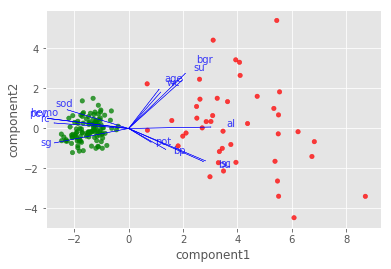

In [17]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

### Lab Question 1

After adding in all of numeric columns (by removing the ordinal ones), do the green, non-chronic kidney disease patients group closer together than before?

#### Answer:
Yes


Additional Exploration

Alter your code so that you only drop the id and classification columns. In fact, if you loaded your dataset properly, you won't have to drop the id column, because it wouldn't have been included as a feature. For the remaining 10 nominal features, properly encode them by as explained in the Feature Representation section by creating new, boolean columns using Pandas .get_dummies(). You should be able to carry that out with a single line of code. Run your assignment again and see if your results have changed at all.

In [18]:
df = pd.read_csv('Datasets/kidney_disease.csv')

In [19]:
df = df.drop(['id'], axis = 1)


In [20]:
df=df.dropna(axis=0, how='any')

In [21]:
pd.get_dummies(df)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,0,1,0,1,0,1,1,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,...,1,0,0,1,1,0,0,1,1,0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,...,1,0,0,1,0,1,1,0,1,0
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,...,0,1,0,1,0,1,1,0,1,0
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,...,0,1,0,1,0,1,0,1,1,0
22,48.0,80.0,1.025,4.0,0.0,95.0,163.0,7.7,136.0,3.8,...,1,0,1,0,1,0,0,1,1,0
27,69.0,70.0,1.010,3.0,4.0,264.0,87.0,2.7,130.0,4.0,...,0,1,1,0,0,1,1,0,1,0
48,73.0,70.0,1.005,0.0,0.0,70.0,32.0,0.9,125.0,4.0,...,1,0,1,0,0,1,1,0,1,0
58,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,0,1,1,0,1,0,1,0,1,0
71,46.0,60.0,1.010,1.0,0.0,163.0,92.0,3.3,141.0,4.0,...,1,0,1,0,1,0,1,0,1,0


In [22]:
df = df.drop([ 'classification','age','wc','rc','bgr','rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis = 1)


In [23]:
pca = PCA(n_components=2)
pca.fit(df)
PCA(copy=True, n_components=2, whiten=False)

T = pca.transform(df)

Features by importance:
 [(254.9347432982992, 'bu'), (38.882517465830325, 'bp'), (36.08199367513225, 'pcv'), (20.85330157195857, 'sod'), (14.97182266697375, 'sc'), (11.32044675828039, 'hemo'), (5.2016443546680895, 'al'), (4.6613037474815675, 'pot'), (1.4823200934876644, 'su'), (0.016560747422407075, 'sg')]


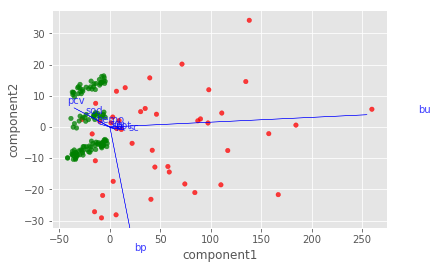

In [24]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

### Lab Question 2

After converting the nominal features to boolean features, do the green, non-chronic kidney disease patients group even closer together than before?

#### Answer:
Yes
After adding in all the other features and properly encoding those that need to be, you should notice that your separation between CKD and Non-CKD patients increases significantly. Recall what was mentioned in the Determining Features > Feature Importance section about the purse strap length feature: by taking many secondary features and combining them, machine learning is usually able to come up with more informative descriptions of your data.